In [ ]:
#  防止报错
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
# 安装 YOLOv8
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO
YOLO('yolov8n.pt')  # 预训练模型

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 81.2MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
# 连接google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls /content/drive/MyDrive/


 captured_images   captured_images.zip	'Colab Notebooks'  '无标题文档 (1).gdoc'   无标题文档.gdoc


In [ ]:
# 修改yaml文件
import yaml
yaml_file = "/content/drive/MyDrive/captured_images/dataset.yaml"

# 读取 YAML 文件
with open(yaml_file, "r") as file:
    data = yaml.safe_load(file)

# 修改数据路径
data["train"] = "/content/drive/MyDrive/captured_images/images"
data["val"] = "/content/drive/MyDrive/captured_images/images"

# 写入修改后的 YAML 文件
with open(yaml_file, "w") as file:
    yaml.dump(data, file, default_flow_style=False)

print("✅ YAML 文件修改完成")


✅ YAML 文件修改完成


In [ ]:
# 加载 YOLOv8-Seg 预训练模型
model = YOLO("yolov8n-seg.pt")

# 训练模型（使用 Google Drive 中的数据）
model.train(data="/content/drive/MyDrive/captured_images/dataset.yaml",
            epochs=100, imgsz=1024, batch=8, device="cuda")


100%|██████████| 6.74M/6.74M [00:00<00:00, 126MB/s]


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/captured_images/dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=1024, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 24.1MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/captured_images/labels... 749 images, 0 backgrounds, 0 corrupt: 100%|██████████| 749/749 [07:45<00:00,  1.61it/s]


train: New cache created: /content/drive/MyDrive/captured_images/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.4' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/captured_images/labels.cache... 749 images, 0 backgrounds, 0 corrupt: 100%|██████████| 749/749 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.39G     0.5006     0.6291      3.717     0.8556         11       1024: 100%|██████████| 94/94 [00:53<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:18<00:00,  2.52it/s]


                   all        749        757      0.734      0.516      0.529      0.472      0.734      0.516      0.529      0.489

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.44G     0.5448     0.5678      2.477     0.8735         11       1024: 100%|██████████| 94/94 [00:40<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:19<00:00,  2.37it/s]


                   all        749        757       0.71      0.735      0.796      0.687       0.71      0.735      0.795      0.737

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100       3.4G     0.5396     0.5687      1.945     0.8674         10       1024: 100%|██████████| 94/94 [00:40<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:18<00:00,  2.52it/s]


                   all        749        757      0.854      0.774      0.807      0.714      0.854      0.774      0.807      0.751

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.44G     0.5512     0.5716      1.707     0.8661          8       1024: 100%|██████████| 94/94 [00:38<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:19<00:00,  2.44it/s]


                   all        749        757      0.819      0.973      0.901      0.785      0.819      0.973      0.901      0.827

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.35G     0.5173     0.5224       1.34     0.8712         11       1024: 100%|██████████| 94/94 [00:39<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.64it/s]


                   all        749        757      0.872      0.964      0.921      0.826      0.872      0.964      0.921      0.857

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.44G     0.4996      0.514      1.186     0.8602         11       1024: 100%|██████████| 94/94 [00:40<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.78it/s]


                   all        749        757      0.922      0.973      0.981      0.891      0.922      0.973      0.981      0.919

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.43G     0.4799     0.5242     0.9971     0.8464         11       1024: 100%|██████████| 94/94 [00:41<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.80it/s]

                   all        749        757      0.913      0.997      0.983      0.892      0.913      0.997      0.983      0.905



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.34G     0.4784     0.5151     0.9056     0.8518          8       1024: 100%|██████████| 94/94 [00:39<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.78it/s]

                   all        749        757      0.997          1      0.995      0.906      0.997          1      0.995      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.41G     0.4925     0.5176     0.8065     0.8618          9       1024: 100%|██████████| 94/94 [00:40<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.82it/s]

                   all        749        757      0.995      0.999      0.995      0.903      0.995      0.999      0.995      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.44G     0.4627     0.4877     0.6818     0.8436          7       1024: 100%|██████████| 94/94 [00:40<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.77it/s]

                   all        749        757      0.998          1      0.995      0.902      0.998          1      0.995      0.943



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.41G     0.4525     0.4987      0.635     0.8456         13       1024: 100%|██████████| 94/94 [00:39<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:18<00:00,  2.50it/s]

                   all        749        757      0.997      0.999      0.995      0.914      0.997      0.999      0.995      0.936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.34G     0.4473      0.475     0.5771      0.852         15       1024: 100%|██████████| 94/94 [00:39<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.81it/s]

                   all        749        757      0.993       0.99      0.995      0.917      0.993       0.99      0.995      0.923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.33G     0.4515     0.4856     0.5485     0.8523         11       1024: 100%|██████████| 94/94 [00:39<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.87it/s]

                   all        749        757      0.994      0.998      0.995      0.918      0.994      0.998      0.995      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.42G     0.4341     0.4854     0.5042      0.839         12       1024: 100%|██████████| 94/94 [00:38<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.77it/s]

                   all        749        757      0.991          1      0.995      0.921      0.991          1      0.995      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.31G     0.4221     0.4886     0.4767     0.8423          8       1024: 100%|██████████| 94/94 [00:38<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.72it/s]

                   all        749        757      0.998      0.999      0.995      0.927      0.998      0.999      0.995      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.39G     0.4213     0.4848      0.489     0.8345         12       1024: 100%|██████████| 94/94 [00:41<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.81it/s]

                   all        749        757      0.997      0.999      0.995      0.923      0.997      0.999      0.995      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.37G     0.4229     0.5027     0.4592      0.837         15       1024: 100%|██████████| 94/94 [00:39<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.89it/s]

                   all        749        757      0.998          1      0.995      0.929      0.998          1      0.995      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.42G     0.3956     0.4661      0.421     0.8298         10       1024: 100%|██████████| 94/94 [00:39<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.90it/s]

                   all        749        757      0.997          1      0.995      0.926      0.997          1      0.995      0.938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.35G     0.4217     0.4943     0.4355     0.8385         11       1024: 100%|██████████| 94/94 [00:39<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.88it/s]

                   all        749        757      0.996          1      0.995      0.929      0.996          1      0.995      0.938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.38G     0.4063     0.4623     0.4144     0.8378          9       1024: 100%|██████████| 94/94 [00:39<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.81it/s]

                   all        749        757      0.997          1      0.995      0.931      0.997          1      0.995      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.39G        0.4     0.4807     0.4129     0.8362         10       1024: 100%|██████████| 94/94 [00:41<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.87it/s]

                   all        749        757      0.996          1      0.995      0.933      0.996          1      0.995      0.941



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.37G     0.4126     0.4927     0.4107     0.8364          9       1024: 100%|██████████| 94/94 [00:40<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.87it/s]

                   all        749        757      0.997          1      0.995      0.932      0.997          1      0.995      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100       3.4G     0.4042     0.4773     0.3772     0.8312          9       1024: 100%|██████████| 94/94 [00:39<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.84it/s]

                   all        749        757      0.998      0.999      0.995      0.922      0.998      0.999      0.995      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.37G     0.3962     0.4526     0.3686     0.8305         10       1024: 100%|██████████| 94/94 [00:39<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.83it/s]

                   all        749        757      0.997      0.999      0.995      0.934      0.997      0.999      0.995       0.94



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.4G     0.3929     0.4498      0.374     0.8288         13       1024: 100%|██████████| 94/94 [00:39<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:19<00:00,  2.42it/s]

                   all        749        757      0.998          1      0.995      0.937      0.998          1      0.995      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.35G     0.4026     0.4892     0.3832     0.8424          9       1024: 100%|██████████| 94/94 [00:38<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:18<00:00,  2.57it/s]

                   all        749        757      0.998      0.997      0.995      0.938      0.998      0.997      0.995      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100       3.4G     0.3852     0.4547     0.3603     0.8273         12       1024: 100%|██████████| 94/94 [00:38<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.68it/s]

                   all        749        757      0.997      0.999      0.995      0.941      0.997      0.999      0.995      0.945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100       3.4G     0.3965     0.4648     0.3712     0.8296         10       1024: 100%|██████████| 94/94 [00:39<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.87it/s]

                   all        749        757      0.983      0.994      0.995      0.931      0.983      0.994      0.995      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.35G     0.3894     0.4666     0.3482     0.8328          9       1024: 100%|██████████| 94/94 [00:39<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.83it/s]

                   all        749        757      0.999          1      0.995      0.938      0.999          1      0.995       0.94



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.37G     0.3918     0.4593     0.3359      0.841          5       1024: 100%|██████████| 94/94 [00:41<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.90it/s]

                   all        749        757      0.997          1      0.995      0.927      0.997          1      0.995       0.95



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.38G     0.3932     0.4639     0.3357     0.8315         12       1024: 100%|██████████| 94/94 [00:39<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.83it/s]

                   all        749        757      0.998          1      0.995       0.93      0.998          1      0.995      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.38G      0.383     0.4437     0.3273     0.8276         12       1024: 100%|██████████| 94/94 [00:39<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.86it/s]

                   all        749        757      0.998      0.998      0.995      0.944      0.998      0.998      0.995      0.945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.35G     0.3808     0.4691     0.3293     0.8314          5       1024: 100%|██████████| 94/94 [00:39<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.83it/s]

                   all        749        757      0.998          1      0.995      0.939      0.998          1      0.995      0.948



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.4G     0.3752     0.4657     0.3195     0.8304          8       1024: 100%|██████████| 94/94 [00:39<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.83it/s]

                   all        749        757      0.998          1      0.995      0.948      0.998          1      0.995      0.941



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.39G     0.3733     0.4555     0.3196      0.833         14       1024: 100%|██████████| 94/94 [00:40<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.82it/s]

                   all        749        757      0.971      0.977      0.985      0.932      0.971      0.977      0.985      0.925



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.42G     0.3655     0.4409     0.3345     0.8307          7       1024: 100%|██████████| 94/94 [00:39<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.86it/s]

                   all        749        757      0.998          1      0.995      0.945      0.998          1      0.995      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.39G     0.3609     0.4627     0.3119     0.8232         11       1024: 100%|██████████| 94/94 [00:39<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.87it/s]

                   all        749        757      0.998          1      0.995      0.948      0.998          1      0.995       0.94



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.38G     0.3622     0.4423     0.3165     0.8191          9       1024: 100%|██████████| 94/94 [00:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.62it/s]

                   all        749        757      0.998          1      0.995      0.943      0.998          1      0.995      0.941



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.35G     0.3729     0.4696     0.3212      0.826         10       1024: 100%|██████████| 94/94 [00:38<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:18<00:00,  2.55it/s]

                   all        749        757      0.998          1      0.995      0.934      0.998          1      0.995      0.941



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.39G     0.3635     0.4586     0.3176     0.8279          9       1024: 100%|██████████| 94/94 [00:38<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.84it/s]

                   all        749        757      0.998          1      0.995      0.944      0.998          1      0.995      0.943



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100       3.4G     0.3674     0.4743     0.3001     0.8301          9       1024: 100%|██████████| 94/94 [00:39<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.87it/s]

                   all        749        757      0.997      0.999      0.995      0.943      0.997      0.999      0.995      0.944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.37G     0.3712     0.4481     0.3087     0.8252          7       1024: 100%|██████████| 94/94 [00:39<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.87it/s]

                   all        749        757      0.997          1      0.995       0.95      0.997          1      0.995      0.949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100       3.4G     0.3588     0.4408     0.2935     0.8159          8       1024: 100%|██████████| 94/94 [00:38<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.90it/s]

                   all        749        757      0.998          1      0.995      0.945      0.998          1      0.995      0.948



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.39G     0.3585     0.4515     0.2978      0.815         12       1024: 100%|██████████| 94/94 [00:40<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.83it/s]

                   all        749        757      0.998          1      0.995      0.942      0.998          1      0.995      0.947



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.46G     0.3516      0.459     0.2946     0.8265         10       1024: 100%|██████████| 94/94 [00:39<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.80it/s]

                   all        749        757      0.998      0.999      0.995      0.953      0.998      0.999      0.995       0.94



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.36G     0.3543     0.4454       0.29      0.823         10       1024: 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.66it/s]

                   all        749        757      0.998          1      0.995      0.949      0.998          1      0.995      0.944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.38G      0.357     0.4372     0.2883      0.825         10       1024: 100%|██████████| 94/94 [00:37<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.74it/s]


                   all        749        757      0.997          1      0.995      0.947      0.997          1      0.995      0.946

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.41G     0.3493     0.4312     0.2736     0.8175         11       1024: 100%|██████████| 94/94 [00:38<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.90it/s]

                   all        749        757      0.998          1      0.995      0.953      0.998          1      0.995      0.948



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.33G     0.3505     0.4563     0.2751     0.8217          7       1024: 100%|██████████| 94/94 [00:40<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.85it/s]

                   all        749        757      0.998          1      0.995      0.945      0.998          1      0.995       0.95



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.33G     0.3539     0.4518     0.2813     0.8275         12       1024: 100%|██████████| 94/94 [00:38<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.89it/s]

                   all        749        757      0.998          1      0.995      0.953      0.998          1      0.995      0.948



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.42G     0.3519     0.4377     0.2727     0.8218          9       1024: 100%|██████████| 94/94 [00:39<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.86it/s]

                   all        749        757      0.998          1      0.995      0.955      0.998          1      0.995      0.946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.33G     0.3487     0.4334     0.2806     0.8274         11       1024: 100%|██████████| 94/94 [00:39<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.93it/s]


                   all        749        757      0.998          1      0.995      0.951      0.998          1      0.995      0.949

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.33G     0.3521     0.4434     0.2708     0.8222         12       1024: 100%|██████████| 94/94 [00:38<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.92it/s]

                   all        749        757      0.998      0.999      0.995      0.951      0.998      0.999      0.995      0.949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.35G     0.3482     0.4434     0.2664     0.8208         12       1024: 100%|██████████| 94/94 [00:41<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.92it/s]

                   all        749        757      0.998          1      0.995      0.957      0.998          1      0.995      0.945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.35G     0.3342     0.4286      0.257     0.8117         11       1024: 100%|██████████| 94/94 [00:39<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.89it/s]

                   all        749        757      0.998          1      0.995      0.959      0.998          1      0.995      0.948



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.38G     0.3426     0.4523     0.2711     0.8216          7       1024: 100%|██████████| 94/94 [00:38<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.78it/s]

                   all        749        757      0.998          1      0.995      0.953      0.998          1      0.995      0.948



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.33G     0.3513     0.4514     0.2669     0.8264          7       1024: 100%|██████████| 94/94 [00:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.74it/s]

                   all        749        757      0.999          1      0.995       0.96      0.999          1      0.995      0.947



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.37G      0.335     0.4288     0.2516     0.8211         11       1024: 100%|██████████| 94/94 [00:37<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.73it/s]

                   all        749        757      0.998          1      0.995      0.958      0.998          1      0.995      0.951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/94 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# 如果中断了运行这个
from ultralytics import YOLO

# 加载上次的模型
model = YOLO("/content/drive/MyDrive/last_copy.pt")

# 继续训练（从上次中断的地方开始）
model.train(resume=True)


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/last_copy.pt, data=/content/drive/MyDrive/captured_images/dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=1024, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/last_copy.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

train: Scanning /content/drive/MyDrive/captured_images/labels.cache... 749 images, 0 backgrounds, 0 corrupt: 100%|██████████| 749/749 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/captured_images/labels.cache... 749 images, 0 backgrounds, 0 corrupt: 100%|██████████| 749/749 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Resuming training /content/drive/MyDrive/last_copy.pt from epoch 84 to 100 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.44G     0.3028     0.4074     0.2153     0.8106         11       1024: 100%|██████████| 94/94 [00:44<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.79it/s]

                   all        749        757      0.999          1      0.995      0.972      0.999          1      0.995      0.955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.42G     0.2934     0.4072     0.2121     0.8103         11       1024: 100%|██████████| 94/94 [00:40<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.87it/s]

                   all        749        757      0.999          1      0.995       0.97      0.999          1      0.995      0.957



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.38G     0.2842     0.3998     0.1989     0.8106         10       1024: 100%|██████████| 94/94 [00:40<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.66it/s]

                   all        749        757      0.999          1      0.995      0.967      0.999          1      0.995      0.955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.41G     0.2937     0.4081     0.2056     0.8065          8       1024: 100%|██████████| 94/94 [00:39<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.62it/s]

                   all        749        757      0.999          1      0.995      0.966      0.999          1      0.995      0.957



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.33G     0.2798     0.3888      0.203     0.8167         11       1024: 100%|██████████| 94/94 [00:39<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.79it/s]

                   all        749        757      0.999          1      0.995      0.969      0.999          1      0.995      0.954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.41G     0.2807     0.3946     0.2027     0.8127         11       1024: 100%|██████████| 94/94 [00:40<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.91it/s]

                   all        749        757      0.999          1      0.995      0.967      0.999          1      0.995      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100       3.4G     0.2829     0.3989     0.2097     0.8019         11       1024: 100%|██████████| 94/94 [00:40<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.74it/s]

                   all        749        757      0.998          1      0.995      0.968      0.998          1      0.995      0.957


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.31G     0.2723     0.3849     0.1994     0.7901          5       1024: 100%|██████████| 94/94 [00:40<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.92it/s]

                   all        749        757      0.998          1      0.995      0.971      0.998          1      0.995      0.954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.31G     0.2691     0.3755     0.1998      0.796          5       1024: 100%|██████████| 94/94 [00:39<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.86it/s]

                   all        749        757      0.999          1      0.995      0.969      0.999          1      0.995      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100       3.3G     0.2622     0.3739     0.1936     0.7865          5       1024: 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.85it/s]

                   all        749        757      0.998          1      0.995       0.97      0.998          1      0.995      0.955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100       3.3G     0.2627     0.3723     0.1864      0.793          5       1024: 100%|██████████| 94/94 [00:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.80it/s]

                   all        749        757      0.999          1      0.995      0.967      0.999          1      0.995      0.957



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100       3.3G      0.265      0.373     0.1856      0.784          5       1024: 100%|██████████| 94/94 [00:38<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.88it/s]

                   all        749        757      0.999          1      0.995      0.969      0.999          1      0.995      0.955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100       3.3G     0.2574     0.3687     0.1811     0.7923          5       1024: 100%|██████████| 94/94 [00:39<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:15<00:00,  2.95it/s]

                   all        749        757      0.999          1      0.995       0.97      0.999          1      0.995      0.955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100       3.3G     0.2589     0.3642     0.1841     0.7828          5       1024: 100%|██████████| 94/94 [00:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.89it/s]

                   all        749        757      0.999          1      0.995      0.968      0.999          1      0.995      0.956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100       3.3G     0.2553     0.3703     0.1822     0.7918          5       1024: 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.86it/s]

                   all        749        757      0.999          1      0.995      0.972      0.999          1      0.995      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100       3.3G     0.2559     0.3724     0.1771     0.7837          5       1024: 100%|██████████| 94/94 [00:37<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.76it/s]

                   all        749        757      0.999          1      0.995      0.969      0.999          1      0.995      0.959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100       3.3G     0.2548     0.3624      0.172     0.7785          5       1024: 100%|██████████| 94/94 [00:36<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.68it/s]

                   all        749        757      0.999          1      0.995      0.972      0.999          1      0.995      0.958



17 epochs completed in 0.272 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,234 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.70it/s]


                   all        749        757      0.999          1      0.995      0.972      0.999          1      0.995      0.958
            blue block        273        273          1          1      0.995      0.985          1          1      0.995      0.977
          yellow block         53         53      0.999          1      0.995      0.994      0.999          1      0.995      0.982
           green block        252        260          1          1      0.995       0.98          1          1      0.995      0.964
          purple block        124        124          1          1      0.995      0.982          1          1      0.995      0.969
             red block         24         24      0.997          1      0.995      0.947      0.997          1      0.995      0.942
          orange block         23         23      0.997          1      0.995      0.947      0.997          1      0.995      0.917
Speed: 0.5ms preprocess, 5.0ms inference, 0.0ms loss, 2.8ms postproce

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799d990e6bd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

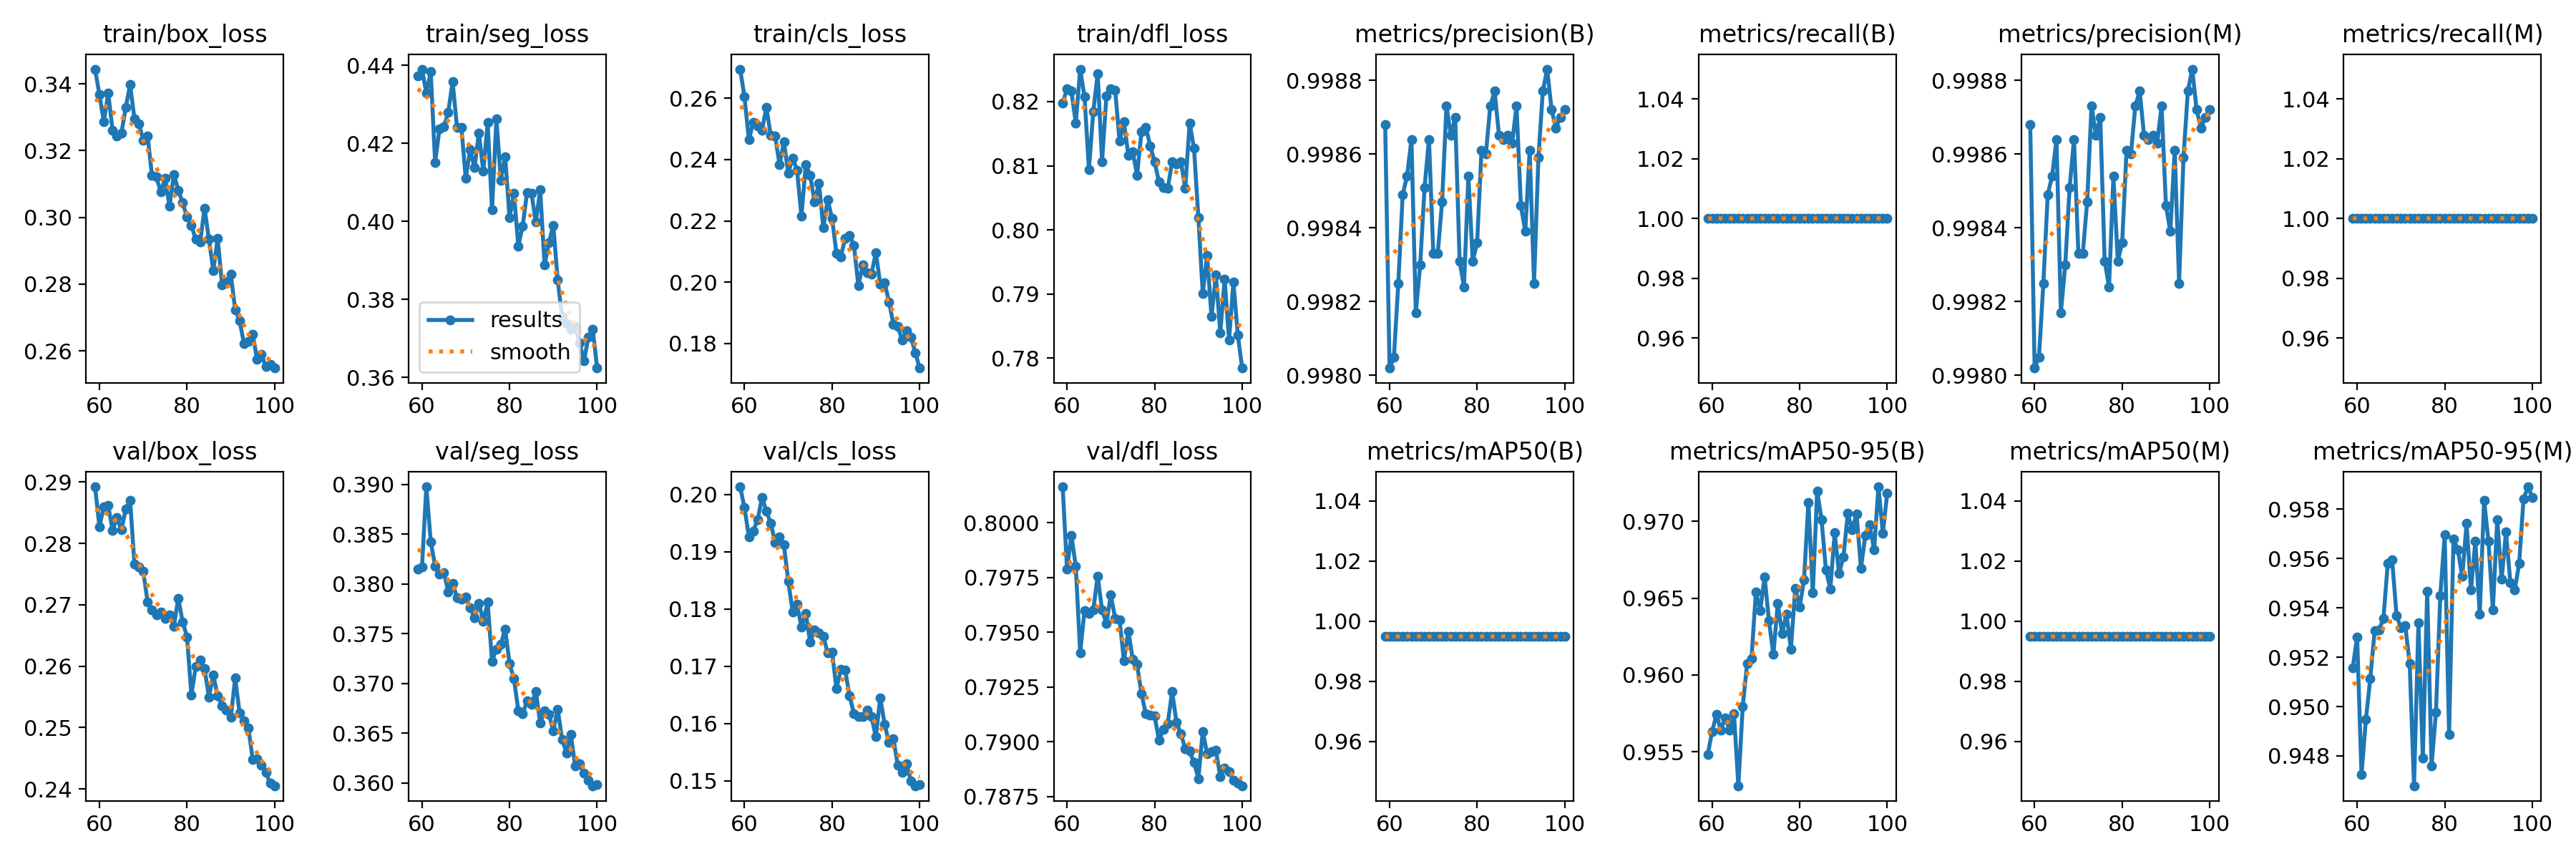

In [ ]:
from IPython.display import display
from PIL import Image

img_path = "runs/segment/train/results.png"
img = Image.open(img_path)
display(img)


In [ ]:
# 保存模型到网盘
import shutil

src_best = "runs/segment/train/weights/best.pt"
dst_best = "/content/drive/MyDrive/best_copy.pt"

src_last = "runs/segment/train/weights/last.pt"
dst_last = "/content/drive/MyDrive/last_copy.pt"

# 定期保存
shutil.copy(src_best, dst_best)
shutil.copy(src_last, dst_last)

print("✅ 当前训练模型已保存到 Google Drive！")


✅ 当前训练模型已保存到 Google Drive！


In [ ]:
from ultralytics import YOLO

# 加载训练好的模型
model = YOLO("runs/segment/train/weights/best.pt")
results = model("/content/drive/MyDrive/captured_images/color_341.jpg", save=True)


image 1/1 /content/drive/MyDrive/captured_images/color_341.jpg: 384x640 1 blue block, 51.0ms
Speed: 2.1ms preprocess, 51.0ms inference, 11.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import shutil

# 预测后的图片路径
predicted_image = "runs/segment/predict/color_341.jpg"

# 目标路径（Google Drive）
destination = "/content/drive/MyDrive/predicted_test.jpg"

# 复制文件
shutil.copy(predicted_image, destination)

print(f"✅ 预测图片已保存到: {destination}")


✅ 预测图片已保存到: /content/drive/MyDrive/predicted_test.jpg


In [ ]:
!ls runs/segment/predict/


color_341.jpg
